## Lasso Regression
1. Applies L1 regularization, adding a penalty term proportional to the **absolute value** of the coefficients.
2. Less important predictors are completely excluded by setting their **coefficients to zero**.
3. Ideal when you suspect that only a subset of predictors is important, and the model should focus on those while ignoring the irrelevant ones.
4. Produces a model that is simpler, retaining only the most significant features and ignoring the rest by **setting their coefficients to zero**. 
5. Shrinks some coefficients to exactly zero, effectively removing their influence from the model. This leads to a simpler model with fewer features
6. May be slower due to the feature selection process
7. Use when you believe only some predictors are truly important (e.g., genetic studies where only a few genes out of thousands are relevant).

## Ridge Regression
1. Applies L2 regularization, adding a penalty term proportional to the **square of the coefficients**
2. Does not perform feature selection. **All predictors are retained**, although their coefficients are reduced in size to minimize overfitting
3. When to use	Best suited for situations where **all predictors are potentially relevant**, and the goal is to reduce overfitting rather than eliminate features
4. Produces a model that includes all features, but their coefficients are smaller in magnitude to prevent overfitting
5. Reduces the magnitude of coefficients, shrinking them towards zero, but does not set any coefficients exactly to zero. All predictors remain in the model	
6. Computation	Generally faster as it doesn’t involve feature selection
7. Example Use Case: Use when you have many predictors, all contributing to the outcome (e.g., predicting house prices where all features like size, location, etc., matter)


https://www.geeksforgeeks.org/machine-learning/implementation-of-lasso-regression-from-scratch-using-python/


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [48]:
# Loading pre-defined Boston Dataset
diabetes = datasets.load_diabetes()

In [49]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

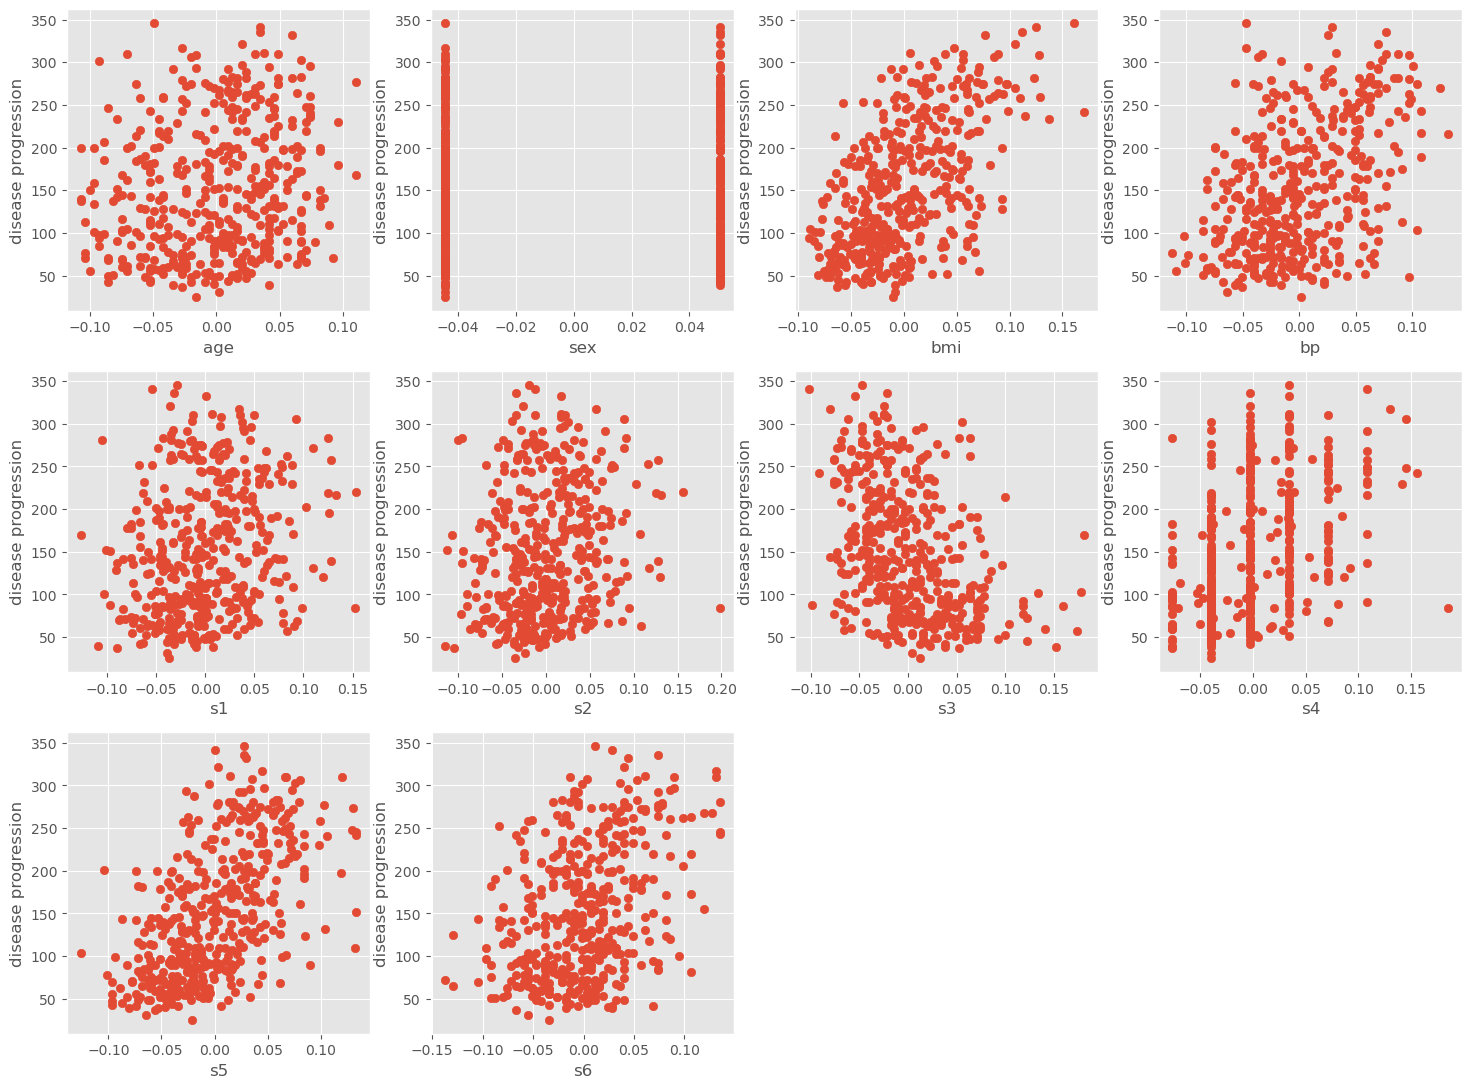

In [50]:
# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))

for index, feature_name in enumerate(diabetes.feature_names):
    ax = fig.add_subplot(4, 4, index + 1)
    ax.scatter(diabetes.data[:, index],diabetes.target)
    ax.set_ylabel('disease progression', size = 12)
    ax.set_xlabel(feature_name, size = 12)

plt.show()

In [51]:
# Load the dataset into Pandas Dataframe
diabetes_pd = pd.DataFrame(diabetes.data)
diabetes_pd.columns = diabetes.feature_names
diabetes_pd_target = np.asarray(diabetes.target)
diabetes_pd['disease progression'] = pd.Series(diabetes_pd_target)

# input 
X = diabetes_pd.iloc[:, :-1]

#output
Y = diabetes_pd.iloc[:, -1]

print(diabetes_pd.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  disease progression  
0 -0.002592  0.019907 -0.017646                151.0  
1 -0.039493 -0.068332 -0.092204                 75.0  
2 -0.002592  0.002861 -0.025930                141.0  
3  0.034309  0.022688 -0.009362                206.0  
4 -0.002592 -0.031988 -0.046641                135.0  


In [52]:
x_train, x_test, y_train, y_test = train_test_split(diabetes_pd.iloc[:, :-1], 
                                                    diabetes_pd.iloc[:, -1], test_size = 0.25)

print("Train data shape of X = % s and Y = % s : "%(
    x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
    x_test.shape, y_test.shape))

Train data shape of X = (331, 10) and Y = (331,) : 
Test data shape of X = (111, 10) and Y = (111,) : 


In [54]:
from sklearn.metrics import mean_squared_error

# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mse = mean_squared_error(y_test,lreg_y_pred)
print("Mean squared Error on test set : ", mse)

# Putting together the coefficient and their corresponding variable names 
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on test set :  2807.1842839678543
  Columns  Coefficient Estimate
0     age            -52.003391
1     sex           -176.991378
2     bmi            570.807764
3      bp            268.021110
4      s1          -1255.503874
5      s2            751.001130
6      s3            391.127657
7      s4            406.820691
8      s5            912.814591
9      s6             56.828362


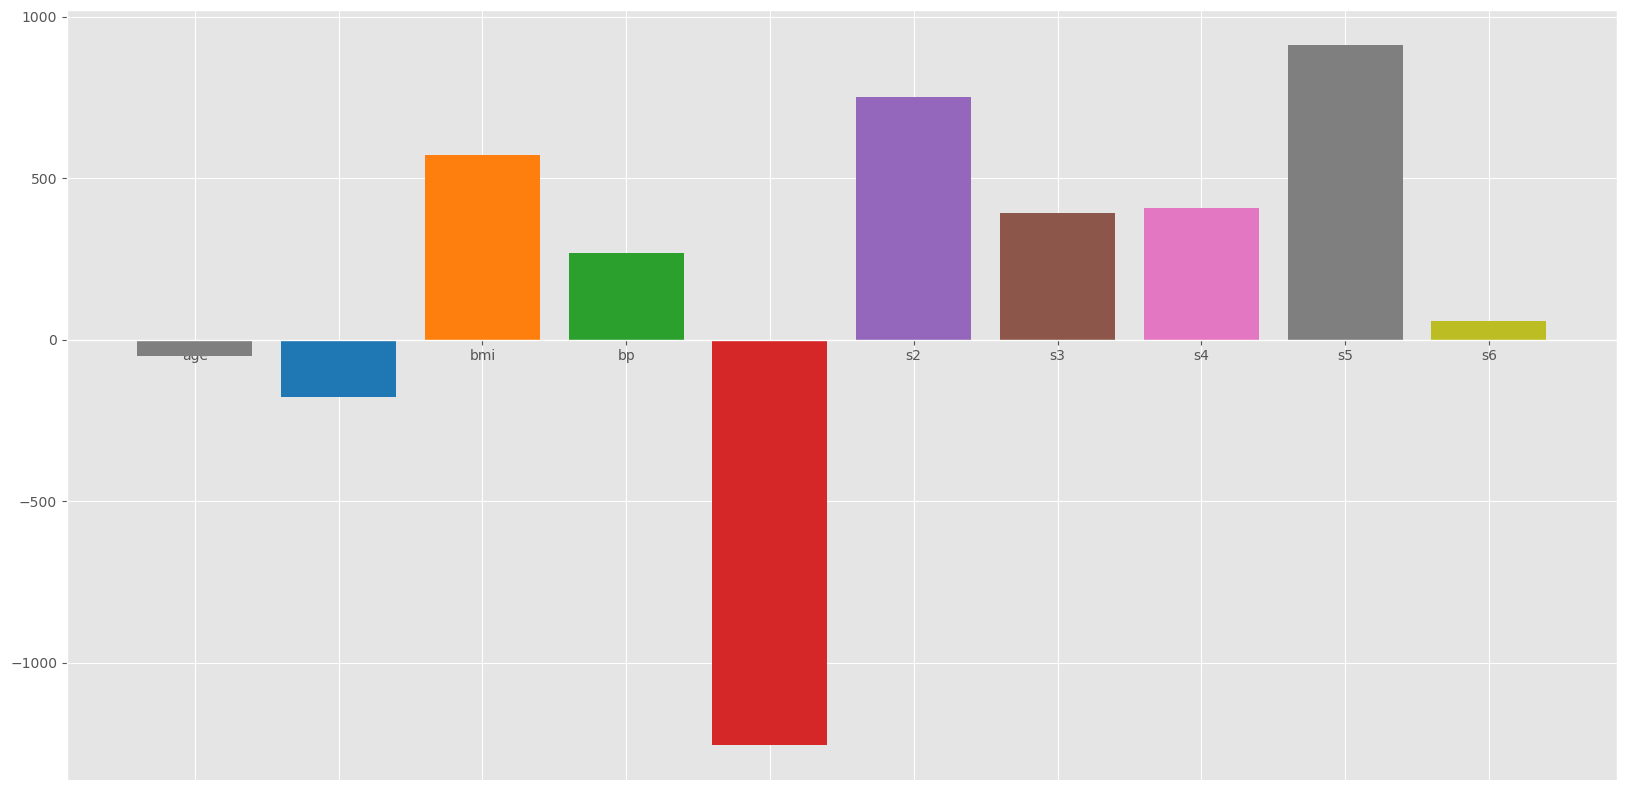

In [55]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange', 
'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lreg_coefficient["Columns"], 
lreg_coefficient['Coefficient Estimate'],color = color
)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [56]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
# Train the model 
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mse = mean_squared_error(y_test, y_pred)
print(mse)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

2995.773311361632
  Columns  Coefficient Estimate
0     age             23.735294
1     sex            -39.667568
2     bmi            277.840055
3      bp            161.947577
4      s1              8.838218
5      s2            -17.766621
6      s3           -149.558436
7      s4            134.798380
8      s5            243.139510
9      s6            107.688972


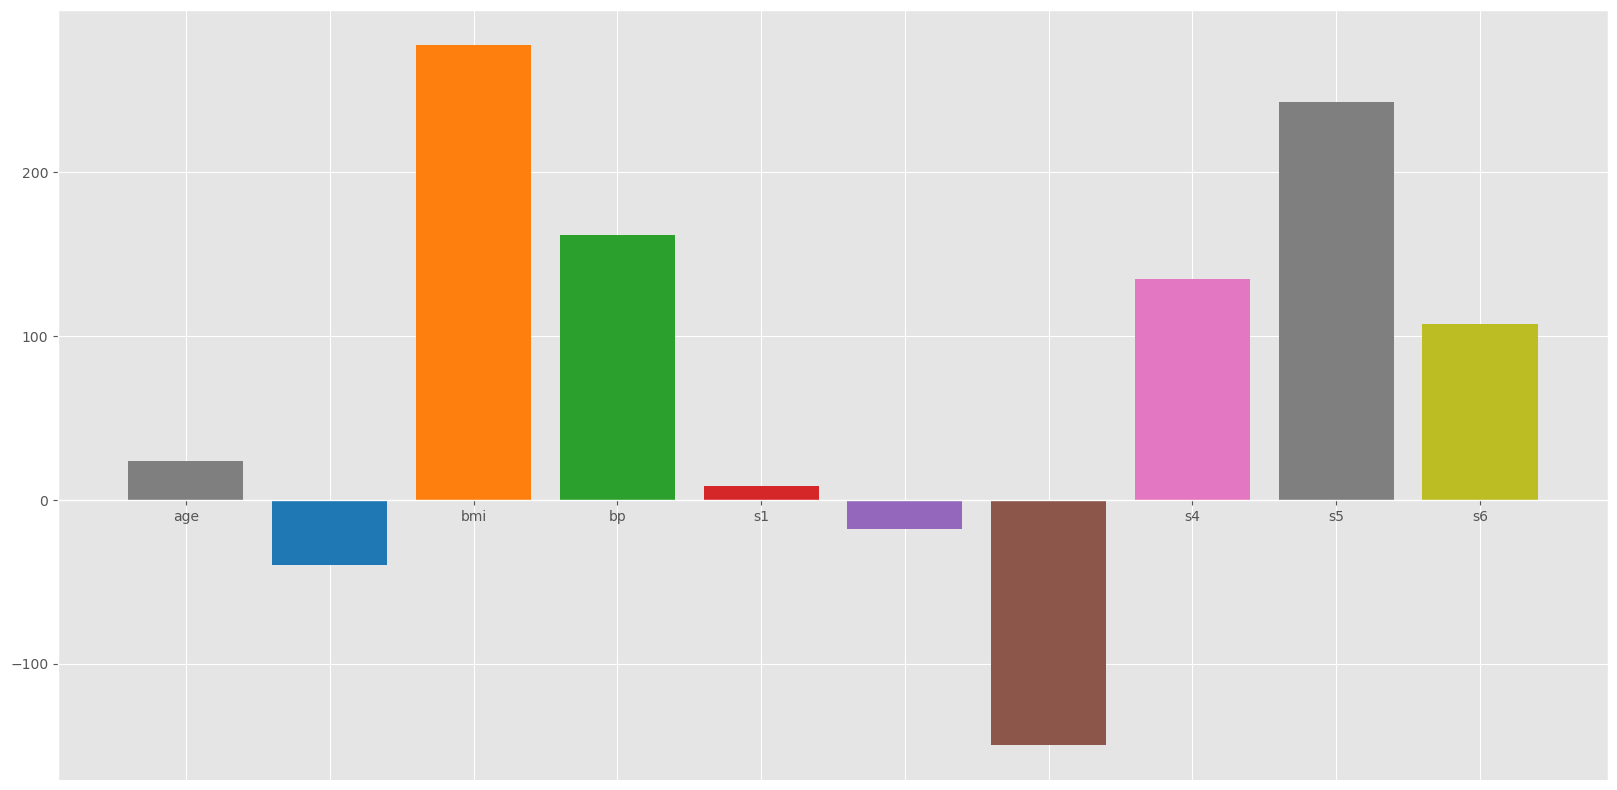

In [57]:
fig, ax = plt.subplots(figsize =(20, 10))

ax.bar(ridge_coefficient["Columns"], 
ridge_coefficient['Coefficient Estimate'],color = color
)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100, 500]}
grid = GridSearchCV(Ridge(), param_grid, cv=5,
                    scoring="neg_mean_squared_error")
grid.fit(x_train, y_train)
best_ridge = grid.best_estimator_
pred_best = best_ridge.predict(x_test)
mse = mean_squared_error(y_test,pred_best)
print("Best alpha selected:", grid.best_params_["alpha"])
print("MSE (best alpha):", mse)
print("Coefficients (best alpha):", best_ridge.coef_)

Best alpha selected: 0.01
MSE (best alpha): 2699.1183341465903
Coefficients (best alpha): [ -48.10916727 -169.80330788  570.33473017  265.58182795 -558.14666391
  217.16345688   67.85472124  292.47162616  645.66482848   63.22693519]


In [60]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mse =mean_squared_error(y_test,y_pred1)
print("Mean squared error on test set", mse)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 3297.4991109750745
  Columns  Coefficient Estimate
0     age              0.000000
1     sex              0.000000
2     bmi            393.882044
3      bp              0.000000
4      s1              0.000000
5      s2              0.000000
6      s3             -0.000000
7      s4              0.000000
8      s5            335.724347
9      s6              0.000000


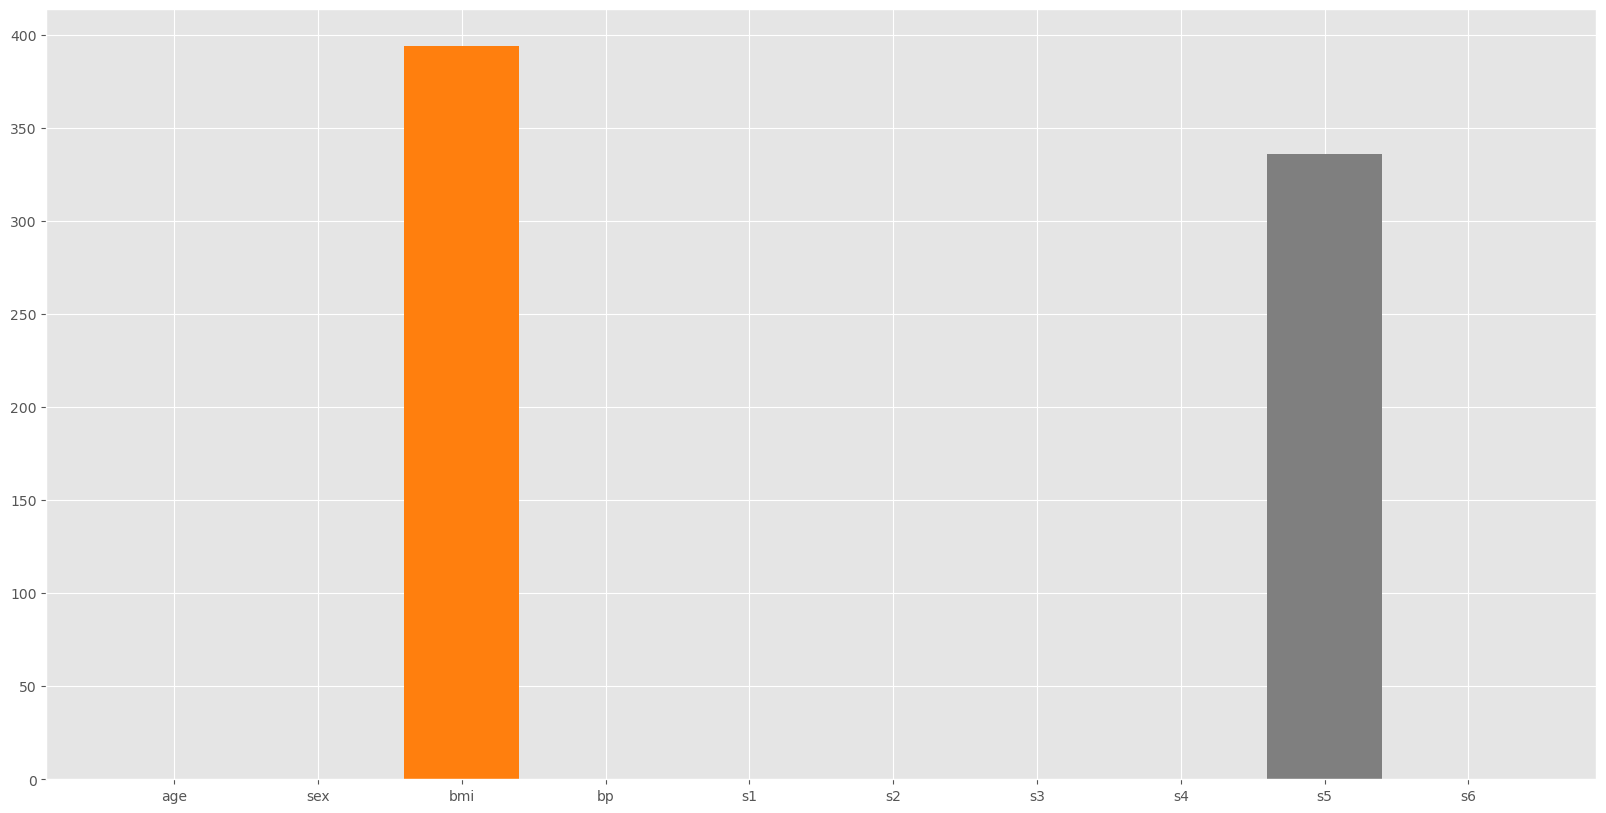

In [64]:
fig, ax = plt.subplots(figsize =(20, 10))

ax.bar(lasso_coeff["Columns"], 
lasso_coeff['Coefficient Estimate'],color = color
)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [61]:
param_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100, 500]}
grid = GridSearchCV(Lasso(), param_grid, cv=5,
                    scoring="neg_mean_squared_error")
grid.fit(x_train, y_train)
best_lasso = grid.best_estimator_
pred_best = best_lasso.predict(x_test)
mse = mean_squared_error(y_test,pred_best)
print("Best alpha selected:", grid.best_params_["alpha"])
print("MSE (best alpha):", mse)
print("Coefficients (best alpha):", best_ridge.coef_)

Best alpha selected: 0.001
MSE (best alpha): 2796.6834191983244
Coefficients (best alpha): [ -48.10916727 -169.80330788  570.33473017  265.58182795 -558.14666391
  217.16345688   67.85472124  292.47162616  645.66482848   63.22693519]
